In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [2]:
# Load the data
data = pd.read_csv('data.csv')

In [3]:
boolean_features = [col for col in data.columns if data[col].nunique() == 2]

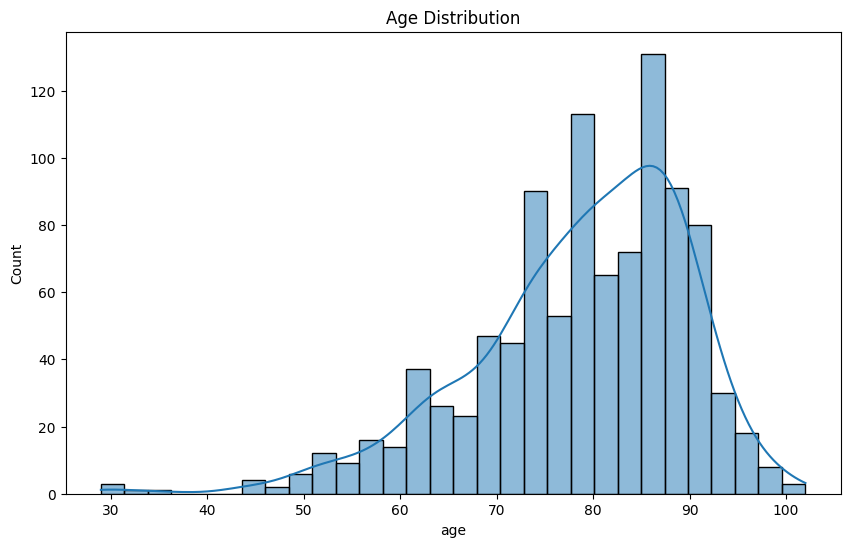

In [4]:
# Show the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

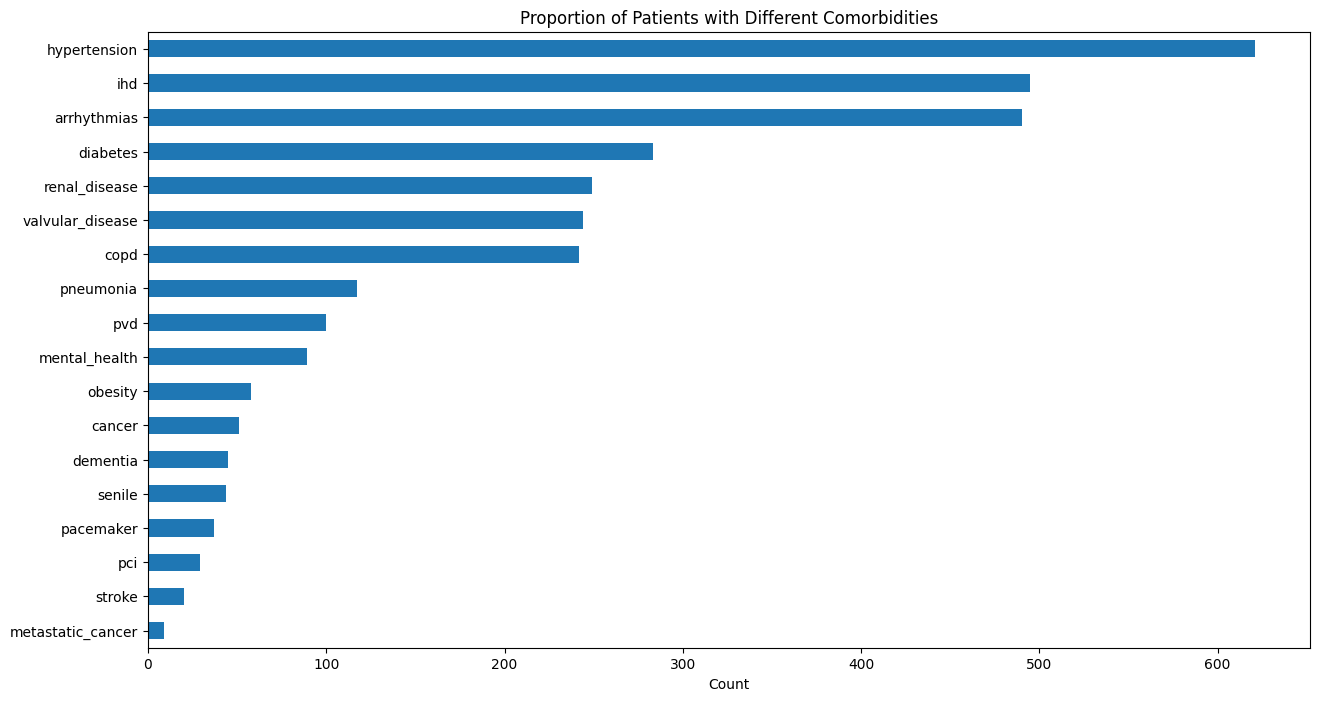

In [5]:
comorbidities = ['cancer', 'dementia', 'diabetes', 'hypertension', 'ihd', 'mental_health', 'arrhythmias', 
                 'copd', 'obesity', 'pvd', 'renal_disease', 'valvular_disease', 'metastatic_cancer', 
                 'pacemaker', 'pneumonia', 'pci', 'stroke', 'senile']
plt.figure(figsize=(15, 8))
data[comorbidities].sum().sort_values().plot(kind='barh')
plt.title('Proportion of Patients with Different Comorbidities')
plt.xlabel('Count')
plt.show()

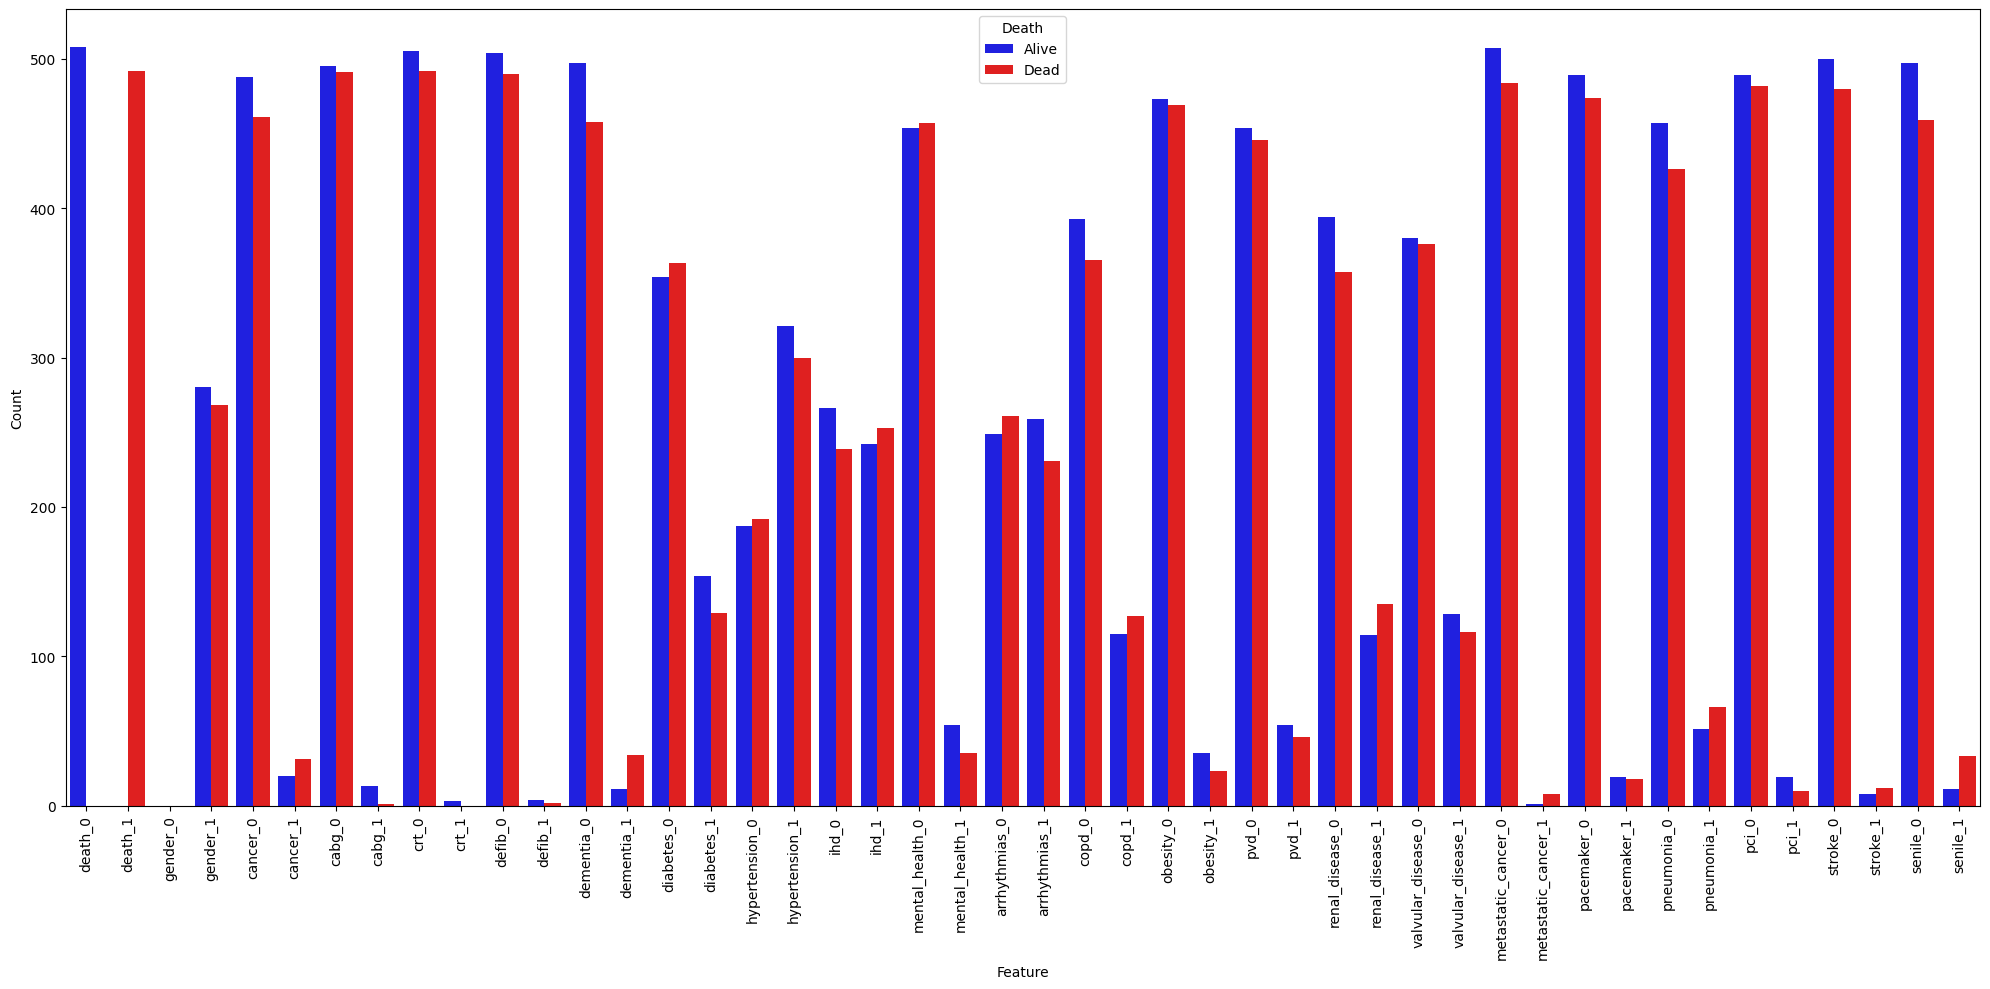

In [6]:
# Create a list to store dataframes
dfs = []

for feature in boolean_features:
    # For each value of the feature (0, 1), generate counts for each survival status
    for val in [0, 1]:
        alive = len(data[(data['death'] == 0) & (data[feature] == val)])
        dead = len(data[(data['death'] == 1) & (data[feature] == val)])

        # Convert to dataframe for easier plotting
        df_alive = pd.DataFrame({'Feature': [f'{feature}_{val}'], 'Count': [alive], 'Death': 'Alive'})
        df_dead = pd.DataFrame({'Feature': [f'{feature}_{val}'], 'Count': [dead], 'Death': 'Dead'})
        
        # Append to the list
        dfs.append(df_alive)
        dfs.append(df_dead)

# Concatenate all dataframes in the list
df = pd.concat(dfs)

# Create a larger plot
plt.figure(figsize=(20, 10))

# Generate plot
sns.barplot(x='Feature', y='Count', hue='Death', data=df, palette=['blue', 'red'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


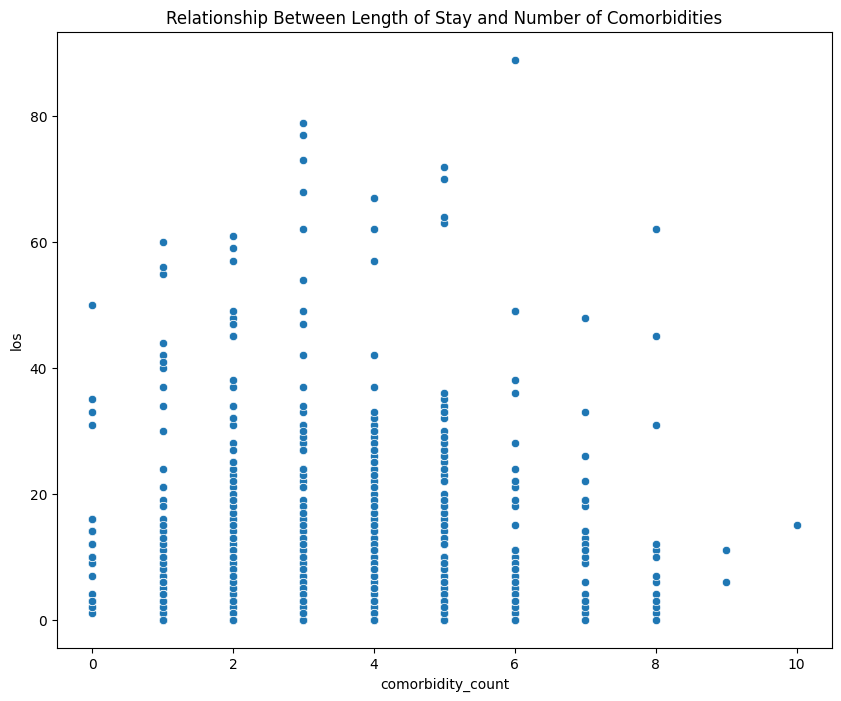

In [7]:
data['comorbidity_count'] = data[comorbidities].sum(axis=1)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='comorbidity_count', y='los', data=data)
plt.title('Relationship Between Length of Stay and Number of Comorbidities')
plt.show()

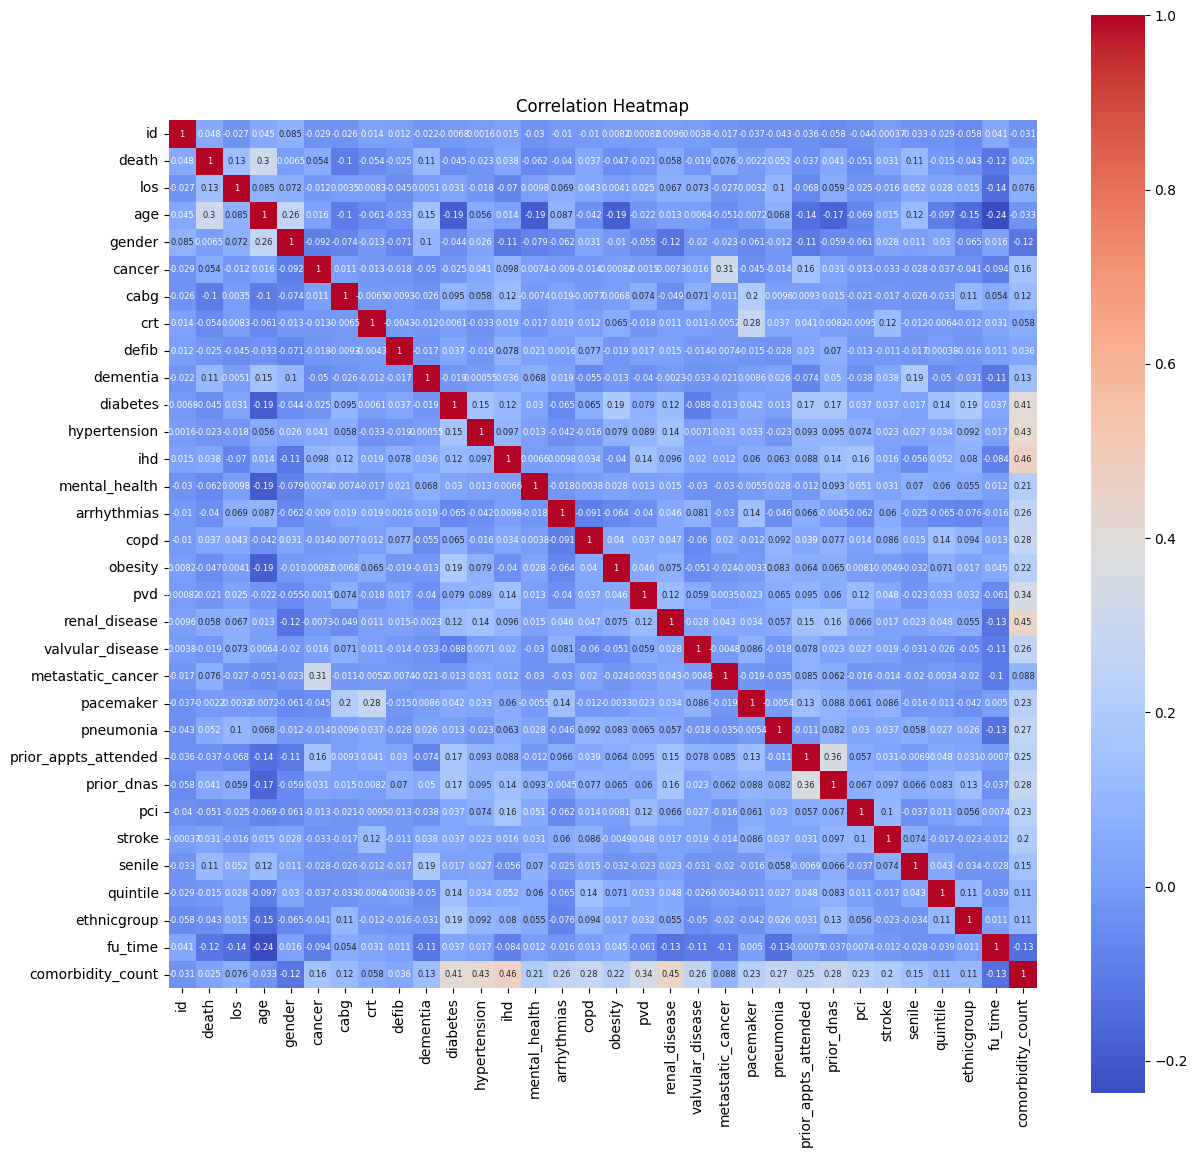

In [8]:

# Correlation between different columns
corr = data.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, annot_kws={"size": 6})
plt.title('Correlation Heatmap')
plt.show()


c:\Users\galle\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\plotting.py:727: UserWarning: For less visual clutter, you may want to subsample to less than 25 individuals.
  warnings.warn("For less visual clutter, you may want to subsample to less than 25 individuals.")


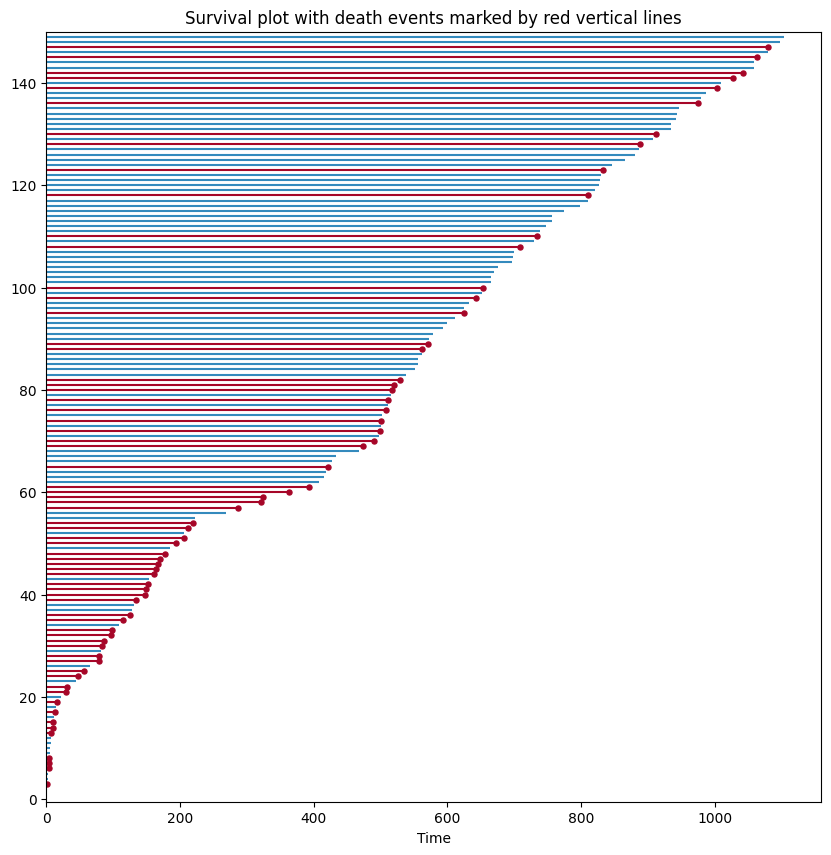

In [9]:
from lifelines.plotting import plot_lifetimes
import matplotlib.pyplot as plt

# Order the data by time
data = data.sort_values('fu_time')

# Sample 25 individuals
data_sample = data.sample(n=150, random_state=42)

# Define observed lifetimes and event indicators
lifetimes = data_sample['fu_time'].values
event_observed = data_sample['death'].values

# Plot
plt.figure(figsize=(10,10))
ax = plot_lifetimes(lifetimes, event_observed=event_observed)

ax.set_xlabel("Time")
ax.set_title("Survival plot with death events marked by red vertical lines")
plt.show()


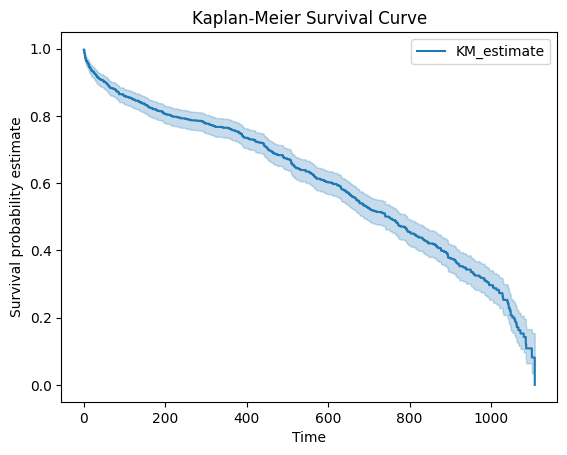

In [10]:
from lifelines import KaplanMeierFitter

# Create a KaplanMeier fitter
kmf = KaplanMeierFitter()

# Fit the fitter to the data
kmf.fit(data['fu_time'], event_observed=data['death'])

# Create a survival plot
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival probability estimate')
plt.show()


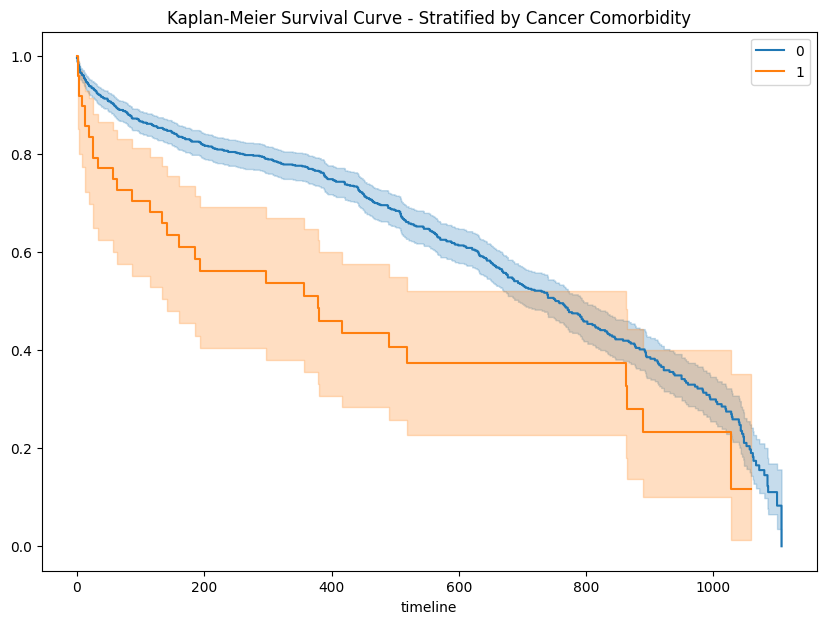

In [11]:
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
# Example: 'cancer' comorbidity. You can change this to explore other comorbidities.
for name, grouped_df in data.groupby('cancer'):
    kmf.fit(grouped_df['fu_time'], grouped_df['death'], label=str(name))
    kmf.plot_survival_function(ax=ax)
plt.title('Kaplan-Meier Survival Curve - Stratified by Cancer Comorbidity')
plt.show()

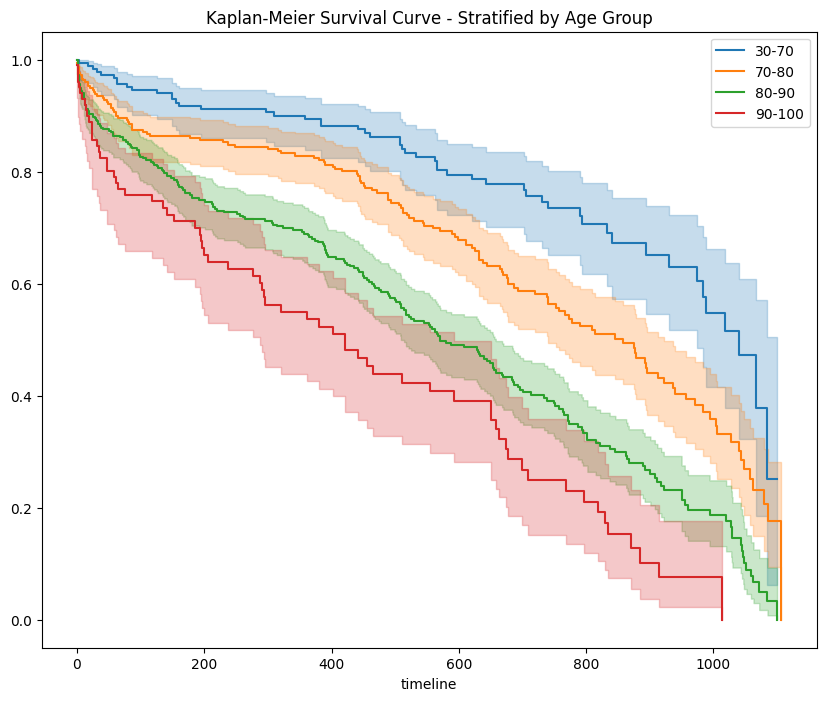

In [12]:
# Splitting the age groups
data['age_group'] = pd.cut(data['age'], bins=[30, 70, 80, 90, float('inf')],
                           labels=['30-70', '70-80', '80-90', '90-100'])

# Creating the Kaplan-Meier plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
kmf = KaplanMeierFitter()

for name, grouped_df in data.groupby('age_group'):
    kmf.fit(grouped_df['fu_time'], grouped_df['death'], label=str(name))
    kmf.plot_survival_function(ax=ax)

plt.title('Kaplan-Meier Survival Curve - Stratified by Age Group')
plt.show()

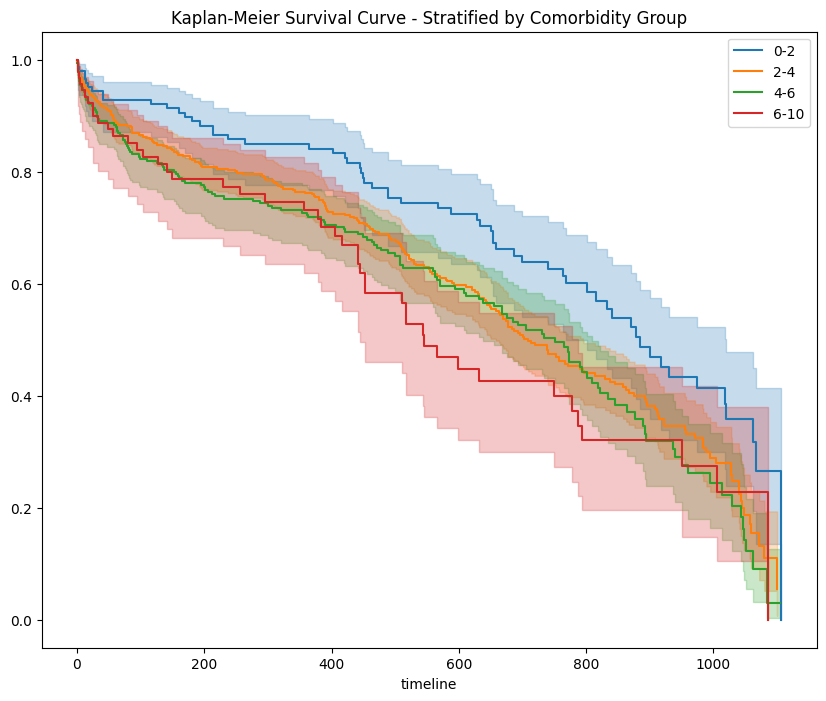

In [13]:
# Splitting the comorbidity groups
data['comorbidity_group'] = pd.cut(data['comorbidity_count'], bins=[0, 2, 4, 6, 10],
                                   labels=['0-2', '2-4', '4-6', '6-10'], right=False)

# Creating the Kaplan-Meier plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
kmf = KaplanMeierFitter()

for name, grouped_df in data.groupby('comorbidity_group'):
    kmf.fit(grouped_df['fu_time'], grouped_df['death'], label=str(name))
    kmf.plot_survival_function(ax=ax)

plt.title('Kaplan-Meier Survival Curve - Stratified by Comorbidity Group')
plt.show()